# Distribution of quantities calculated from parallax data: the posterior PDF and the naive estimator PDF

For a given star the parallax $\varpi$ is measured which is distributed normally around the true value of the parallax $\varpi_\mathrm{true}$ with standard deviation $\sigma_\varpi$. What is the distribution of quantities such as distance, absolute magnitude, tangential velocity, etc, which are directly calculated from the observed parallaxes? For example the true parallax corresponds to a true distance $r$ which can be naively estimated as $\rho=1000/\varpi$ (with parallax in units of mas and distance in units of pc). Below the following questions are discussed and illustrated for several astrophysical quantities of interest:

* What is the distribution of the _naive estimator_ for $r$, namely $\rho$.
* What is the posterior distribution for $r$ using only a minimal prior?

In all cases

\begin{equation}
    p(\varpi\mid\varpi_\mathrm{true}) = \frac{1}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{\varpi - \varpi_\mathrm{true}}{\sigma_\varpi} \right)^2\right)\,.
\end{equation}

## Distance

The distribution of $\rho$ is obtained as

\begin{equation}
    p(\rho\mid\varpi_\mathrm{true}) = p(\varpi=1000/\rho\mid\varpi_\mathrm{true}) \left|\frac{d\varpi}{d\rho}\right|=
     \frac{1000}{\rho^2\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{1000/\rho - \varpi_\mathrm{true}}{\sigma_\varpi} \right)^2\right)\,.
\end{equation}

To derive the posterior distribution for $r$ a prior is needed. The minimal prior for the true distance $r$ ([Bailer-Jones 2015](https://ui.adsabs.harvard.edu/#abs/2015PASP..127..994B/abstract)) is that its value should be positive. The posterior distribution for $r$ in that case is

\begin{equation}
    p(r\mid\varpi) = \begin{cases}
    \frac{1}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{1000/r - \varpi}{\sigma_\varpi} \right)^2\right) & r>0 \\
    0 & r\leq0 
    \end{cases}\,,
\end{equation}

where $\varpi_\mathrm{true} = 1000/r$.

The python code below plots the above distributions for $\varpi_\mathrm{true}=10$ mas and $\varpi=10$ mas, and various choices of $f_\mathrm{true}=\sigma_\varpi/\varpi_\mathrm{true}$ or $f=\sigma_\varpi/\varpi$. The plotted distributions are normalized to their maximum.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from plotstyles import useagab, apply_tufte

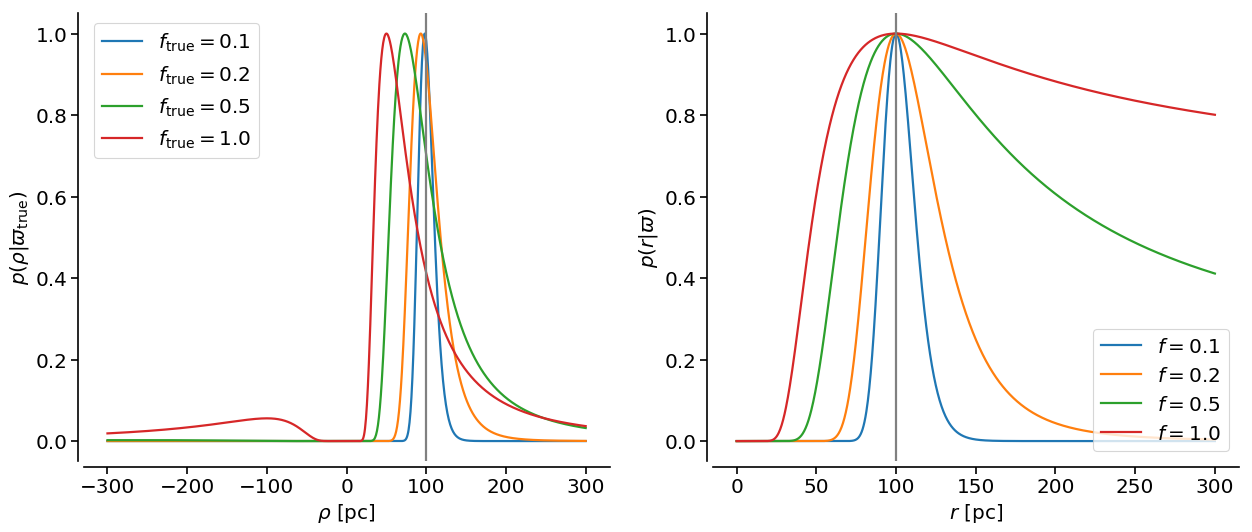

In [4]:
pobs = 10.0
ptrue = 10.0
ftrue = np.array([0.1,0.2,0.5,1.0])
fobs = ftrue

rho = np.linspace(-300,300,1000)
r = np.linspace(0.001,300,1000)

fig, (axA, axB) = plt.subplots(1, 2, figsize=(16,7))
useagab(usetex=False, fontfam='sans', sroncolours=False)

apply_tufte(axA)
apply_tufte(axB)

for f in ftrue:
    pdf = norm.pdf(1000/rho, loc=ptrue, scale=np.abs(f*ptrue))*1000/(rho*rho)
    axA.plot(rho, pdf/pdf.max(),
             label='$f_\mathrm{{true}}={0:.1f}$'.format(f))
axA.set_xlabel(r'$\rho$ [pc]')
axA.set_ylabel(r'$p(\rho|\varpi_\mathrm{true})$')
axA.axvline(x=1000/ptrue, color='gray')
axA.legend()

for f in fobs:
    pdf = norm.pdf(1000/r, loc=pobs, scale=np.abs(f*pobs))
    axB.plot(r, pdf/pdf.max(),
             label='$f={0:.1f}$'.format(f))
axB.set_xlabel(r'$r$ [pc]')
axB.set_ylabel(r'$p(r|\varpi)$')
axB.axvline(x=1000/pobs, color='gray')
axB.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Comments

* The two cases above should not be confused. The distribution of $\rho$ can be derived from that of $\varpi$ through the rules for transforming probability distributions in a variable $x$ to the distribution in some new variable $y=f(x)$, which requires multiplication with the Jacobian $|dx/dy|$. The posterior distribution for $r$, on the other hand, is not calculated from a transformation of $\varpi$ but is derived from Bayes' rule and thus does _not_ involve the Jacobian.

* The distribution of $\rho$ shows the behaviour of the naive estimator for $r$, $\rho=1/\varpi$. The mode of the distribution moves away from the true distance $1000/\varpi_\mathrm{true}$ as the relative error increases. The PDF at negative values of $\rho$ is not zero, which is because negative observed parallaxes are valid measurements, even if a negative distance has no meaning. The negative tail in the PDF for $\rho$ corresponds to negative parallaxes near zero. Note that the distribution of $\rho$ is normalized (as it should be) and is defined everywhere, approaching zero as $\rho\rightarrow \pm0$ or $\rho\rightarrow\pm\infty$.

* One could attempt to calculate the expectation value for $\rho$ and use that as an estimator for $r$. This in turn would allow one to state what the size of the bias in $\langle\rho\rangle$ is and possibly what the variance of the estimator is. However this calculation results in the integral
\begin{equation}
    \langle\rho\rangle = \int_{-\infty}^{+\infty} \frac{1000}{\varpi}
    \frac{1}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{\varpi - \varpi_\mathrm{true}}{\sigma_\varpi} \right)^2\right)\,d\varpi\,,
\end{equation}
which does not converge. Attempts to calculate this integral were made by [Smith & Eichhorn (1996)](https://ui.adsabs.harvard.edu/#abs/1996MNRAS.281..211S/abstract) who resorted to various ways of excluding the observed parallaxes near zero, which is not allowed given that these are perfectly legitimate values.

* Even if the above integral could be evaluated one would end up with an expression for $\langle\rho\rangle$ in terms of the _unknown_ values of $\varpi_\mathrm{true}$ and $f_\mathrm{true}$. This is the fundamental problem with the naive estimator approach, one is forced to discuss the behaviour of the estimator in terms of quantities that in reality are never accessible.

* In contrast the posterior distribution for $r$ does not suffer from these problems. It is specified entirely in terms of the _known_ observed values $\varpi$ and $f$ and the minimal prior correctly excludes negative distances. For negative values of $\varpi$ inspection of the functional form of $p(r|\varpi)$ shows that the mode shifts to $+\infty$, which is consistent with negative parallaxes usually indicating sources at very large distances. Now, as discussed extensively by [Bailer-Jones (2015)](https://ui.adsabs.harvard.edu/#abs/2015PASP..127..994B/abstract) the posterior for the above improper uniform prior on $r$ has its own problems in that the PDF asymptotically ($r\rightarrow\infty$) attains a non-zero value, which implies that the PDF cannot be normalized and has no mean, variance, etc. However, in a Bayesian setting one can modify the prior to take more information into account and thus obtained properly normalized posteriors from which point estimates for $r$ could be made if so desired (see [Bailer-Jones 2015,](https://ui.adsabs.harvard.edu/#abs/2015PASP..127..994B/abstract) for details).

## Absolute magnitude

We now consider the absolute magnitude estimated from the apparent magnitude $m$ (assumed to be known without error) and the observed parallax. The true value $M$ is given by

\begin{equation}
    M = m + 5\log_{10}\varpi_\mathrm{true} - 10\,,
\end{equation}

where the parallax is again in units of mas and the distance in pc. The inverse relation is

\begin{equation}
    \varpi_\mathrm{true} = 10^{0.2(M-m+10)}\,.
\end{equation}

The distribution of the naive estimator $\mu=m + 5\log_{10}\varpi - 10$ for $M$ is given by

\begin{equation}
    p(\mu\mid\varpi_\mathrm{true}) = \begin{cases}
    0.2\ln 10 \times \frac{10^{0.2(\mu-m+10)}}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{10^{0.2(\mu-m+10)} - \varpi_\mathrm{true}}{\sigma_\varpi} \right)^2\right) 
    & \varpi>0 \\
    \text{undefined!} & \varpi\leq0
    \end{cases}\,.
\end{equation}

The posterior for $M$ for a flat prior with no upper or lower limits is

\begin{equation}
    p(M\mid\varpi) = \frac{1}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\frac{10^{0.2(M-m+10)} - \varpi}{\sigma_\varpi} \right)^2\right)\,.
\end{equation}

The python code below plots the above distributions for $m=5$, $\varpi_\mathrm{true}=10$ mas, $\varpi=10$ mas, and various choices of $f_\mathrm{true}=\sigma_\varpi/\varpi_\mathrm{true}$ or $f=\sigma_\varpi/\varpi$. The plotted distributions are normalized to their maximum.

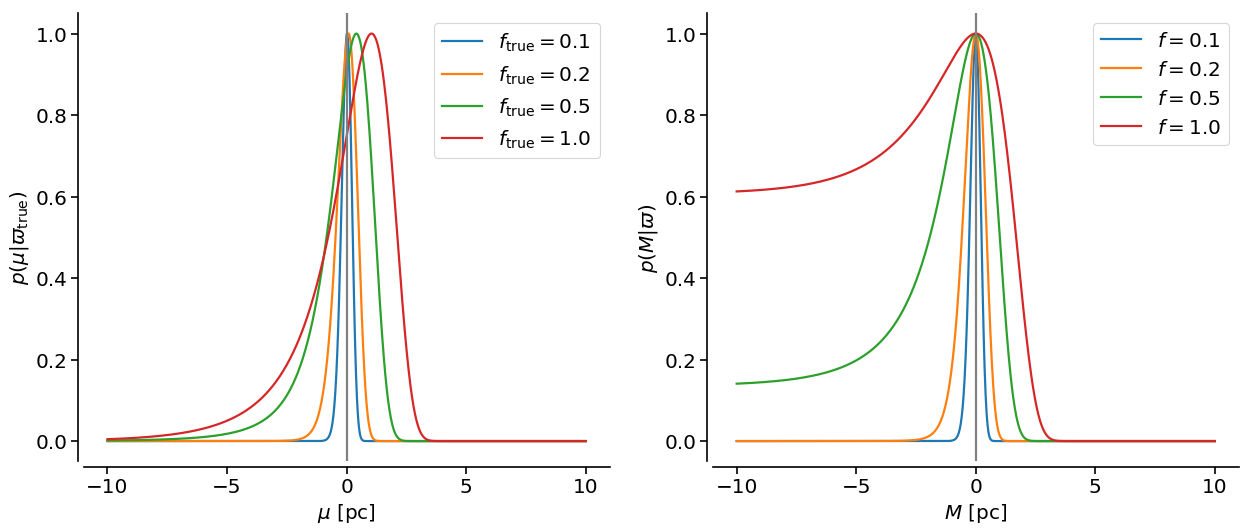

In [30]:
m = 5.0
pobs = 10.0
ptrue = 10.0
ftrue = np.array([0.1,0.2,0.5,1.0])
fobs = ftrue

mu = np.linspace(-10,10,1000)
M = np.linspace(-10,10,1000)

fig, (axA, axB) = plt.subplots(1, 2, figsize=(16,7))
useagab(usetex=False, fontfam='sans', sroncolours=False)

apply_tufte(axA)
apply_tufte(axB)

for f in ftrue:
    pdf = norm.pdf(10**(0.2*(mu-m+10)), loc=ptrue, scale=np.abs(f*ptrue))*(0.2*np.log(10)*10**(0.2*(mu-m+10)))
    axA.plot(mu, pdf/pdf.max(),
             label='$f_\mathrm{{true}}={0:.1f}$'.format(f))
axA.set_xlabel(r'$\mu$ [pc]')
axA.set_ylabel(r'$p(\mu|\varpi_\mathrm{true})$')
axA.axvline(x=m+5*np.log10(ptrue)-10, color='gray')
axA.legend()

for f in fobs:
    pdf = norm.pdf(10**(0.2*(M-m+10)), loc=pobs, scale=np.abs(f*pobs))
    axB.plot(M, pdf/pdf.max(),
             label='$f={0:.1f}$'.format(f))
axB.set_xlabel(r'$M$ [pc]')
axB.set_ylabel(r'$p(M|\varpi)$')
axB.axvline(x=m+5*np.log10(pobs)-10, color='gray')
axB.legend()

plt.tight_layout()
plt.show()

### Comments

* The distribution for $\mu$ looks nice but keep in mind that it is not defined for $\varpi\leq0$, as then the transformation $\mu=m+5\log_{10}\varpi-10$ is not defined. Overlooking the latter point could mislead one into thinking that estimators such as the mean of $\mu$ and its variance are well defined when in fact the non-positive tail of the observations has been discarded. The problem that $\mu$ is expressed in terms of unknown quantities of course remains.
* The posterior distribution for $M$ converges to a non-zero constant as $M\rightarrow -\infty$ which again implies that the moments of the distribution are not defined (leaving, as for $p(r\mid\varpi)$, the mode as the only reasonable point estimate for $M$ in case a flat prior is used).

## Tangential velocity

The value of the tangential velocity of a star is proportional to $\mu/\varpi$, with $\mu$ the proper motion, hence the same considerations as for the distance inferred from parallax apply.

## Kinetic energy and angular momentum

These quantities are proportional to velocity squared and the product of distance and velocity respectively, hence they are both proportional to $(1000/\varpi)^2$ (when calculated with respect to the observer). The distribution of $\zeta=\rho^2=10^6/\varpi^2$ is given by

\begin{equation}
    p(\zeta\mid\varpi_\mathrm{true}) =
     \frac{1000}{2\zeta^{1.5}\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\dfrac{1000\zeta^{-0.5} - \varpi_\mathrm{true}}{\sigma_\varpi} \right)^2\right)\,.
\end{equation}

The posterior distribution for $z=r^2$ is now

\begin{equation}
    p(z\mid\varpi) = \begin{cases}
    \frac{1}{\sigma_\varpi\sqrt{2\pi}} \exp \left(
    -\frac{1}{2}\left(\dfrac{1000z^{-0.5} - \varpi}{\sigma_\varpi} \right)^2\right) & z>0 \\
    0 & z\leq0
    \end{cases}\,.
\end{equation}

The python code below plots the above distributions for $\varpi_\mathrm{true}=10$ mas and $\varpi=10$ mas, and various choices of $f_\mathrm{true}=\sigma_\varpi/\varpi_\mathrm{true}$ or $f=\sigma_\varpi/\varpi$. The plotted distributions are normalized to their maximum.

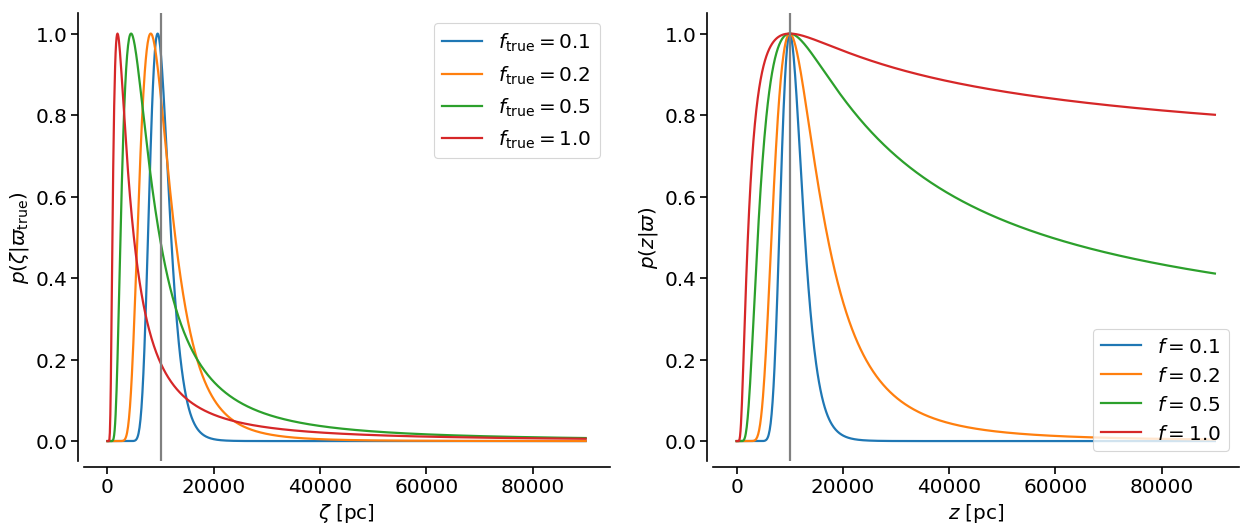

In [44]:
pobs = 10.0
ptrue = 10.0
ftrue = np.array([0.1,0.2,0.5,1.0])
fobs = ftrue

zeta = np.linspace(0.001,90000,1000)
z = np.linspace(0.001,90000,1000)

fig, (axA, axB) = plt.subplots(1, 2, figsize=(16,7))
useagab(usetex=False, fontfam='sans', sroncolours=False)

apply_tufte(axA)
apply_tufte(axB)

for f in ftrue:
    pdf = norm.pdf(1000/np.sqrt(zeta), loc=ptrue, scale=np.abs(f*ptrue))*1000/(2*zeta**1.5)
    axA.plot(zeta, pdf/pdf.max(),
             label='$f_\mathrm{{true}}={0:.1f}$'.format(f))
axA.set_xlabel(r'$\zeta$ [pc]')
axA.set_ylabel(r'$p(\zeta|\varpi_\mathrm{true})$')
axA.axvline(x=(1000/ptrue)**2, color='gray')
axA.legend()

for f in fobs:
    pdf = norm.pdf(1000/np.sqrt(z), loc=pobs, scale=np.abs(f*pobs))
    axB.plot(z, pdf/pdf.max(),label='$f={0:.1f}$'.format(f))
axB.set_xlabel(r'$z$ [pc]')
axB.set_ylabel(r'$p(z|\varpi)$')
axB.axvline(x=(1000/pobs)**2, color='gray')
axB.legend(loc='lower right')

plt.tight_layout()
plt.show()